In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = pd.read_csv("/Users/anastasia/Downloads/sales_team_performance_data.csv")
sales_df.head()

,Deal_ID,Deal_Value,Deal_Stage,Deal_Close_Date,Deal_Open_Date,Salesperson_ID,Salesperson_Name,Region,Team,Quota,Close_Rate,Average_Deal_Cycle,Win_Rate,Number_of_Deals,Customer_ID,Customer_Industry,Customer_Size,Stage_Duration,Lead_Source,Follow_Ups
0,D0001,37972,Closed Lost,2024-01-07,2024-03-06,S004,Tanya Berg,Europe,Channel Sales,232543,89.32,36,58.62,1,C0366,Tech,Small,8,Cold Call,1
1,D0002,61678,Proposal Sent,NaN,2024-09-29,S044,Terry Brown,Europe,Channel Sales,176137,57.30,77,33.45,30,C0440,Retail,Medium,19,Referral,5
2,D0003,27804,Proposal Sent,NaN,2024-06-19,S050,Keith Gray,North America,SMB,206940,66.11,75,50.81,9,C0359,Tech,Large,25,Event,4
3,D0004,89427,Closed Won,2024-10-04,2024-08-18,S046,Tony Schmitt,Europe,SMB,195598,83.84,43,66.17,1,C0483,Finance,Medium,9,Website,4
4,D0005,23378,Qualified,NaN,2024-08-12,S018,Mariah Ruiz,Europe,Enterprise,56090,52.71,58,70.09,24,C0100,Retail,Large,9,Event,1


In [52]:
closed_lost_df = sales_df[sales_df["Deal_Stage"]=="Closed Lost"]
closed_lost_summary = closed_lost_df.groupby(["Team", "Region"]).agg({
    "Deal_Value": "mean",
    "Stage_Duration": "mean",
    "Deal_ID": "size"
}).rename(columns={
    "Deal_Value":"Avg_Deal_Value",
    "Stage_Duration": "Avg_Stage_Duration",
    "Deal_ID": "Total_Closed_Lost"
})

display(closed_lost_summary)

#NB - find this method of grouping using "agg" very useful

Avg_Deal_Value  Avg_Stage_Duration  \
Team          Region                                              
Channel Sales APAC             61855.562500           17.000000   
              Europe           51348.421053           17.631579   
              North America    50933.476190           16.904762   
Enterprise    APAC             49247.444444           16.833333   
              Europe           58550.076923           15.923077   
              North America    44594.461538           14.461538   
SMB           APAC             58182.937500           19.750000   
              Europe           57950.866667           13.600000   
              North America    64397.187500           17.250000   

                             Total_Closed_Lost  
Team          Region                            
Channel Sales APAC                          16  
              Europe                        19  
              North America                 21  
Enterprise    APAC                          18  
              Europe                        13  
              North America                 13  
SMB           APAC                          16  
              Europe                        15  
              North America                 16

In [60]:
avg_deal_value = np.mean(closed_lost_df["Deal_Value"])
median_deal_value = np.median(closed_lost_df["Deal_Value"])
std_dev_deal_value = np.std(closed_lost_df["Deal_Value"])
print("Closed Lost Summary\n")
print(f"Mean Deal Value: {avg_deal_value:.2f}")
print(f"Median Deal Value: {median_deal_value:.2f}")
print(f"Deal Value Std Dev: {std_dev_deal_value:.2f}")

Closed Lost Summary

Mean Deal Value: 55052.99
Median Deal Value: 55522.00
Deal Value Std Dev: 25918.35


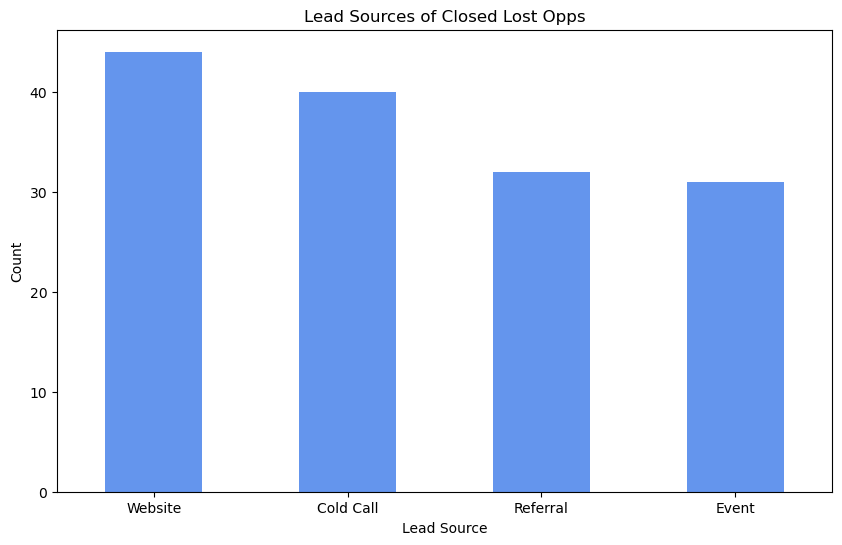

In [68]:
lead_source_count = closed_lost_df["Lead_Source"].value_counts()
lead_source_count.plot(kind="bar", figsize=(10,6), color="cornflowerblue")
plt.title("Lead Sources of Closed Lost Opps")
plt.ylabel("Count")
plt.xlabel("Lead Source")
plt.xticks(rotation=0)
plt.show()

In [70]:
lead_source_df = sales_df.groupby("Lead_Source").agg({
    "Deal_Value":"mean",
    "Deal_ID":"size"
}).rename(columns={
    "Deal_Value":"Avg_Deal_Value",
    "Deal_ID":"Total_Deals"
})
display(lead_source_df)

,Avg_Deal_Value,Total_Deals
Lead_Source,,
Cold Call,54121.151408,284
Event,52258.036735,245
Referral,53423.824786,234
Website,51910.721519,237


In [80]:
win_rate_by_source = sales_df[sales_df["Deal_Stage"]=="Closed Won"].groupby("Lead_Source").size()/sales_df.groupby("Lead_Source").size()*100
display(win_rate_by_source)

Lead_Source
Cold Call    15.140845
Event        20.408163
Referral     15.384615
Website      18.987342
dtype: float64

In [111]:
sales_df.head()

,Deal_ID,Deal_Value,Deal_Stage,Deal_Close_Date,Deal_Open_Date,Salesperson_ID,Salesperson_Name,Region,Team,Quota,Close_Rate,Average_Deal_Cycle,Win_Rate,Number_of_Deals,Customer_ID,Customer_Industry,Customer_Size,Stage_Duration,Lead_Source,Follow_Ups
0,D0001,37972,Closed Lost,2024-01-07,2024-03-06,S004,Tanya Berg,Europe,Channel Sales,232543,89.32,36,58.62,1,C0366,Tech,Small,8,Cold Call,1
1,D0002,61678,Proposal Sent,NaN,2024-09-29,S044,Terry Brown,Europe,Channel Sales,176137,57.30,77,33.45,30,C0440,Retail,Medium,19,Referral,5
2,D0003,27804,Proposal Sent,NaN,2024-06-19,S050,Keith Gray,North America,SMB,206940,66.11,75,50.81,9,C0359,Tech,Large,25,Event,4
3,D0004,89427,Closed Won,2024-10-04,2024-08-18,S046,Tony Schmitt,Europe,SMB,195598,83.84,43,66.17,1,C0483,Finance,Medium,9,Website,4
4,D0005,23378,Qualified,NaN,2024-08-12,S018,Mariah Ruiz,Europe,Enterprise,56090,52.71,58,70.09,24,C0100,Retail,Large,9,Event,1


In [119]:
closed_won_df = sales_df[sales_df["Deal_Stage"]=="Closed Won"]
closed_won_summary = closed_won_df.groupby(["Region", "Team"]).agg({
    "Deal_Value":"mean",
    "Deal_ID":"size"
}).rename(columns={
    "Deal_Value":"Avg_Deal_Value",
    "Deal_ID":"Total_Deals"
})
display(closed_won_summary)
    

Avg_Deal_Value  Total_Deals
Region        Team                                      
APAC          Channel Sales    50129.478261           23
              Enterprise       50487.000000           14
              SMB              51990.888889           18
Europe        Channel Sales    51658.473684           19
              Enterprise       34619.923077           13
              SMB              52979.888889           27
North America Channel Sales    46486.857143           21
              Enterprise       51168.047619           21
              SMB              52482.722222           18

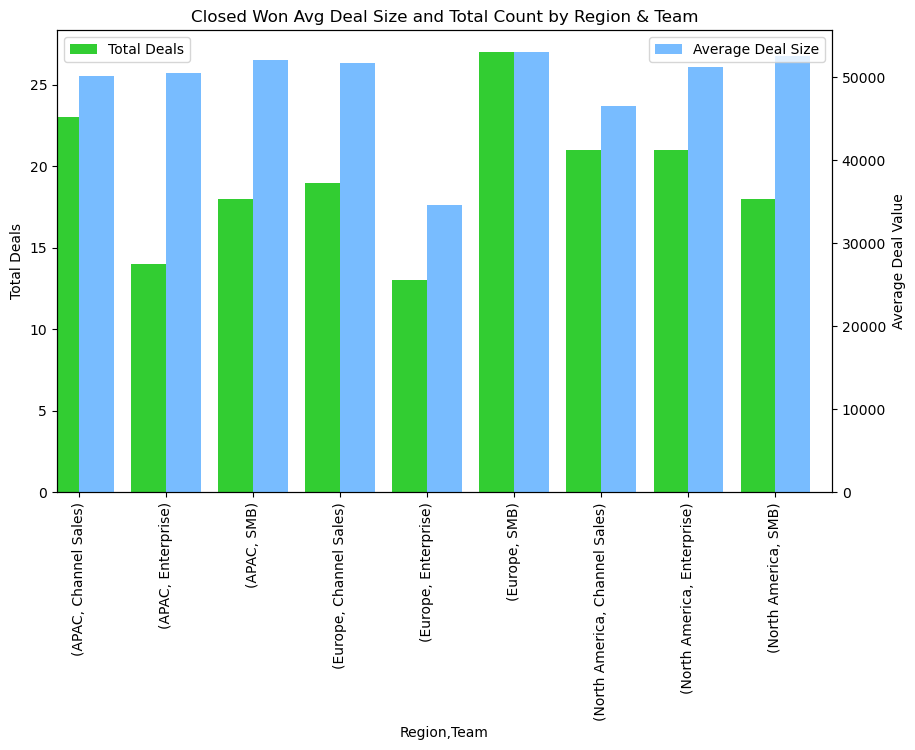

In [125]:
fig, ax1 = plt.subplots(figsize=(10,6))
closed_won_summary["Total_Deals"].plot(kind="bar", ax=ax1, color="limegreen", width=0.4, position=1)
ax1.set_ylabel("Total Deals")
ax1.set_title("Closed Won Avg Deal Size and Total Count by Region & Team")

ax2 = ax1.twinx()
closed_won_summary["Avg_Deal_Value"].plot(kind="bar", ax=ax2, color="dodgerblue", width=0.4, position=0, alpha=0.6)
ax2.set_ylabel("Average Deal Value")

ax1.legend(["Total Deals"], loc="upper left")
ax2.legend(["Average Deal Size"], loc="upper right")
plt.xticks(rotation=0)
plt.show()